In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from libary import *
from recurrent import *
from ARMA import *

In [2]:
train_ratio = 0.5
valid_ratio = 0.25

# Select frequency
frequencies = ['min','5min','15min','60min','D']
frequencies_number_of_samples = np.multiply([390,78,26,7,1],252)

Frequency: D
ARMA
Period: 0, p: 5, q: 5, mse: [0.00042705 0.0002505 ]
Period: 1, p: 2, q: 2, mse: [0.00016597 0.00016889]
Period: 2, p: 4, q: 4, mse: [8.14052831e-05 4.73372129e-04]
Period: 3, p: 1, q: 0, mse: [1.21962137e-04 5.64653156e-05]
Period: 4, p: 4, q: 3, mse: [5.24091502e-05 7.21074649e-05]
Period: 5, p: 5, q: 5, mse: [3.37043163e-05 1.15697806e-04]
Period: 6, p: 2, q: 2, mse: [4.12258857e-05 4.07104661e-04]
Period: 7, p: 0, q: 0, mse: [7.62030212e-05 2.42941148e-05]
LSTM
Period: 0
|   iter    |  target   | batch_... |  dropout  | first_... | layer_... | look_back | n_layers  | optimizer |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.000298 |  8.219    |  0.3767   |  8.646    |  0.7197   |  23.97    |  1.607    |  1.535    |
|  2        | -0.000292 |  8.989    |  0.3472   |  18.18    |  0.6087   |  35.01    |  1.42     |  0.681    |
Period: 1
|   iter    |  target   | batch_... |  dropout  | fir

|  1        | -6.383e-0 |  9.036    |  0.5788   |  12.37    |  0.7343   |  14.87    |  2.795    |  0.2348   |
|  2        | -6.486e-0 |  9.478    |  0.2758   |  19.7     |  0.5441   |  25.74    |  2.705    |  0.8856   |
Period: 4
|   iter    |  target   | batch_... |  dropout  | first_... | layer_... | look_back | n_layers  | optimizer |
-------------------------------------------------------------------------------------------------------------
|  1        | -4.521e-0 |  8.222    |  0.554    |  3.353    |  0.7645   |  4.854    |  1.815    |  1.867    |
|  2        | -4.842e-0 |  8.625    |  0.04958  |  4.907    |  0.8733   |  36.69    |  1.382    |  1.958    |
Period: 5
|   iter    |  target   | batch_... |  dropout  | first_... | layer_... | look_back | n_layers  | optimizer |
-------------------------------------------------------------------------------------------------------------
|  1        | -3.745e-0 |  9.885    |  0.581    |  11.05    |  0.8245   |  6.233    |  2.43     |  0

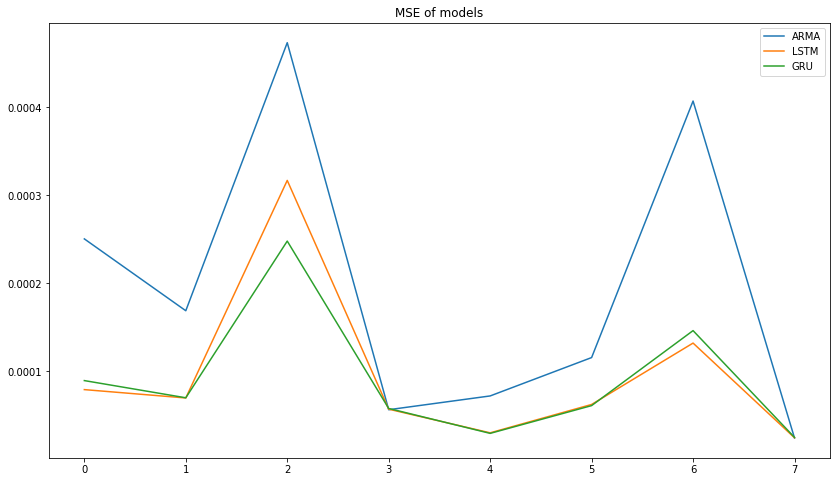

Frequency: 60min
ARMA
Period: 0, p: 5, q: 4, mse: [6.66526811e-05 5.59796666e-05]
Period: 1, p: 5, q: 5, mse: [2.77225482e-05 1.67532403e-04]
Period: 2, p: 3, q: 2, mse: [1.27637702e-05 1.74854816e-04]
Period: 3, p: 2, q: 2, mse: [1.71800408e-05 3.03203407e-05]
Period: 4, p: 5, q: 2, mse: [6.86010981e-06 8.25198133e-06]
Period: 5, p: 3, q: 3, mse: [5.08019076e-06 1.70022552e-05]
Period: 6, p: 5, q: 5, mse: [5.82124385e-06 8.12785456e-05]
Period: 7, p: 5, q: 5, mse: [1.05213922e-05 6.52065746e-06]
LSTM
Period: 0
|   iter    |  target   | batch_... |  dropout  | first_... | layer_... | look_back | n_layers  | optimizer |
-------------------------------------------------------------------------------------------------------------
|  1        | -5.219e-0 |  9.996    |  0.06252  |  11.18    |  0.375    |  21.26    |  2.716    |  0.7859   |
|  2        | -5.263e-0 |  8.699    |  0.06143  |  7.08     |  0.733    |  7.834    |  1.12     |  1.212    |
Period: 1
|   iter    |  target   | batch_.

MemoryError: 

In [3]:
for frequency_index in range(4, -1, -1):
    print(f'Frequency: {frequencies[frequency_index]}')
    number_of_study_periods, study_periods, Data, dates = creating_study_periods(frequencies,\
                                                                                 frequencies_number_of_samples,\
                                                                                 frequency_index)
    # visualize_data(Data, Returns)

    print('ARMA')
    ARMA_parameters, ARMA_mse, ARMA_predictions = train_ARMA(number_of_study_periods, study_periods, train_ratio,\
                                                                 valid_ratio)

    number_of_random_search = 1
    print('LSTM')
    LSTM_names, LSTM_mse, LSTM_predictions = train_recurrent_model('LSTM', number_of_study_periods ,study_periods,\
                                                                       number_of_random_search, train_ratio, valid_ratio)
    print('GRU')
    GRU_names, GRU_mse, GRU_predictions = train_recurrent_model('GRU', number_of_study_periods, study_periods,\
                                                                    number_of_random_search, train_ratio, valid_ratio)
    
    visualize_results((np.concatenate((np.reshape(ARMA_mse[:,1], [number_of_study_periods,1]),\
                          np.reshape(LSTM_mse[:,2], [number_of_study_periods,1]),\
                          np.reshape(GRU_mse[:,2], [number_of_study_periods,1])), axis=1)))
    
    save_results(frequencies, frequency_index,\
                  ARMA_parameters, ARMA_mse, ARMA_predictions,\
                  LSTM_names, LSTM_mse, LSTM_predictions,\
                  GRU_names, GRU_mse, GRU_predictions)


In [ ]:
import statsmodels.api as sm
i = 7
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(study_periods[0,i], lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(study_periods[0,i], lags=40, ax=ax2)# , lags=40